<a href="https://colab.research.google.com/github/gimmas/mini-project-teks/blob/main/clusteringmachine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your CSV file
file_path = '/content/drive/MyDrive/Tugas/TEKS/CSV/self_learning750done.csv'

try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Display confirmation and the first 5 rows of the DataFrame
    print(f"CSV file '{file_path}' loaded successfully.")
    print("First 5 rows:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file exists in the specified path within your Google Drive.")
except Exception as e:
    print(f"An unexpected error occurred while reading the CSV file: {e}")

Mounted at /content/drive
CSV file '/content/drive/MyDrive/Tugas/TEKS/CSV/self_learning750done.csv' loaded successfully.
First 5 rows:
                                        comment_text pseudo_label  \
0  ingat yang menawari pendidikan gratis dan inte...      negatif   
1  mungkin ada sabotase karena jika dari pihak do...      negatif   
2  tidak pejabat nyaga rakyatnya korupsi terus an...      negatif   
3  bagaimana kalau sebenarnya ini jebakan sih gem...      negatif   
4                     wow mie gacoan bergizi katanya      positif   

   confidence_score  
0          0.999160  
1          0.948085  
2          0.999223  
3          0.999375  
4          0.998643  


In [2]:
print("DataFrame Columns:")
print(df.columns)
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

DataFrame Columns:
Index(['comment_text', 'pseudo_label', 'confidence_score'], dtype='object')

First 5 rows of the DataFrame:
                                        comment_text pseudo_label  \
0  ingat yang menawari pendidikan gratis dan inte...      negatif   
1  mungkin ada sabotase karena jika dari pihak do...      negatif   
2  tidak pejabat nyaga rakyatnya korupsi terus an...      negatif   
3  bagaimana kalau sebenarnya ini jebakan sih gem...      negatif   
4                     wow mie gacoan bergizi katanya      positif   

   confidence_score  
0          0.999160  
1          0.948085  
2          0.999223  
3          0.999375  
4          0.998643  


In [3]:
import re

# List of keywords associated with 'judi online'
keywords = [
    'judi online',
    'slot',
    'togel',
    'casino',
    'poker',
    'bonus deposit',
    'daftar sekarang',
    'situs judi',
    'maxwin',
    'jp',
    'jackpot',
    'withdraw',
    'deposit',
    'rtp',
    'gacor',
    'bandar online',
    'taruhan',
    '𝐌𝐎𝐍𝐀',
    '𝑨𝑴𝑩𝑰𝑳𝔻',
    '𝑨𝑴𝑩𝑰𝑳𝐃'

]

# Combine keywords into a case-insensitive regex pattern
# The '|' acts as an OR operator, and re.IGNORECASE makes it case-insensitive
judi_online_pattern = re.compile('|'.join(re.escape(k) for k in keywords), re.IGNORECASE)

print("Keywords for 'judi online' identified:")
for keyword in keywords:
    print(f"- {keyword}")
print(f"\nCombined regular expression pattern: {judi_online_pattern.pattern}")

Keywords for 'judi online' identified:
- judi online
- slot
- togel
- casino
- poker
- bonus deposit
- daftar sekarang
- situs judi
- maxwin
- jp
- jackpot
- withdraw
- deposit
- rtp
- gacor
- bandar online
- taruhan
- 𝐌𝐎𝐍𝐀
- 𝑨𝑴𝑩𝑰𝑳𝔻
- 𝑨𝑴𝑩𝑰𝑳𝐃

Combined regular expression pattern: judi\ online|slot|togel|casino|poker|bonus\ deposit|daftar\ sekarang|situs\ judi|maxwin|jp|jackpot|withdraw|deposit|rtp|gacor|bandar\ online|taruhan|𝐌𝐎𝐍𝐀|𝑨𝑴𝑩𝑰𝑳𝔻|𝑨𝑴𝑩𝑰𝑳𝐃


In [4]:
df

comment_text pseudo_label  \
0    ingat yang menawari pendidikan gratis dan inte...      negatif   
1    mungkin ada sabotase karena jika dari pihak do...      negatif   
2    tidak pejabat nyaga rakyatnya korupsi terus an...      negatif   
3    bagaimana kalau sebenarnya ini jebakan sih gem...      negatif   
4                       wow mie gacoan bergizi katanya      positif   
..                                                 ...          ...   
568                                program gagal parah      negatif   
569  taka ibu aku kalau makanan lebih tidak boleh k...      negatif   
570  programnya bagus tapi pelaksanaannya tidak dik...      negatif   
571                          karena tidak ada sehat ya      negatif   
572                           di tempat aku ada burger      positif   

     confidence_score  
0            0.999160  
1            0.948085  
2            0.999223  
3            0.999375  
4            0.998643  
..                ...  
568          0.999465  
569          0.992791  
570          0.993839  
571          0.986471  
572          0.955815  

[573 rows x 3 columns]

In [6]:
original_text_column_name = 'comment_text'
original_sentiment_column_name = 'pseudo_label'

rows_before_filtering = len(df)

# Filter out rows that contain any of the 'judi online' patterns
df_cleaned = df[~df[original_text_column_name].str.contains(judi_online_pattern, na=False)]

rows_after_filtering = len(df_cleaned)

print(f"Number of rows before filtering: {rows_before_filtering}")
print(f"Number of rows after filtering: {rows_after_filtering}")
print("\nFirst 5 rows of the cleaned DataFrame (before final rename):")
print(df_cleaned.head())

# Rename columns as per user's request: 'comments' and 'label'
df_cleaned = df_cleaned.rename(columns={original_text_column_name: 'comments', original_sentiment_column_name: 'label'})

# Update the global text_column variable to reflect the new column name
global text_column
text_column = 'comments'

print("\nDataFrame columns renamed successfully to 'comments' and 'label'.")
print(df_cleaned.head())

Number of rows before filtering: 573
Number of rows after filtering: 554

First 5 rows of the cleaned DataFrame (before final rename):
                                        comment_text pseudo_label  \
0  ingat yang menawari pendidikan gratis dan inte...      negatif   
1  mungkin ada sabotase karena jika dari pihak do...      negatif   
2  tidak pejabat nyaga rakyatnya korupsi terus an...      negatif   
3  bagaimana kalau sebenarnya ini jebakan sih gem...      negatif   
4                     wow mie gacoan bergizi katanya      positif   

   confidence_score  
0          0.999160  
1          0.948085  
2          0.999223  
3          0.999375  
4          0.998643  

DataFrame columns renamed successfully to 'comments' and 'label'.
                                            comments    label  \
0  ingat yang menawari pendidikan gratis dan inte...  negatif   
1  mungkin ada sabotase karena jika dari pihak do...  negatif   
2  tidak pejabat nyaga rakyatnya korupsi terus an...  ne

In [7]:
display(df_cleaned)

comments    label  \
0    ingat yang menawari pendidikan gratis dan inte...  negatif   
1    mungkin ada sabotase karena jika dari pihak do...  negatif   
2    tidak pejabat nyaga rakyatnya korupsi terus an...  negatif   
3    bagaimana kalau sebenarnya ini jebakan sih gem...  negatif   
4                       wow mie gacoan bergizi katanya  positif   
..                                                 ...      ...   
568                                program gagal parah  negatif   
569  taka ibu aku kalau makanan lebih tidak boleh k...  negatif   
570  programnya bagus tapi pelaksanaannya tidak dik...  negatif   
571                          karena tidak ada sehat ya  negatif   
572                           di tempat aku ada burger  positif   

     confidence_score  
0            0.999160  
1            0.948085  
2            0.999223  
3            0.999375  
4            0.998643  
..                ...  
568          0.999465  
569          0.992791  
570          0.993839  
571          0.986471  
572          0.955815  

[554 rows x 3 columns]

preprocess


In [8]:
import re
import string

def preprocess_text(text):
    text = str(text).lower()  # Convert to string and lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

# Apply preprocessing to the 'comments' column and store in a new column 'cleaned_comments'
df_cleaned['cleaned_comments'] = df_cleaned['comments'].apply(preprocess_text)

print("Data preprocessing complete. A new column 'cleaned_comments' has been added.")
print("First 5 rows with cleaned comments:")
print(df_cleaned[['comments', 'cleaned_comments', 'label']].head())

Data preprocessing complete. A new column 'cleaned_comments' has been added.
First 5 rows with cleaned comments:
                                            comments  \
0  ingat yang menawari pendidikan gratis dan inte...   
1  mungkin ada sabotase karena jika dari pihak do...   
2  tidak pejabat nyaga rakyatnya korupsi terus an...   
3  bagaimana kalau sebenarnya ini jebakan sih gem...   
4                     wow mie gacoan bergizi katanya   

                                    cleaned_comments    label  
0  ingat yang menawari pendidikan gratis dan inte...  negatif  
1  mungkin ada sabotase karena jika dari pihak do...  negatif  
2  tidak pejabat nyaga rakyatnya korupsi terus an...  negatif  
3  bagaimana kalau sebenarnya ini jebakan sih gem...  negatif  
4                     wow mie gacoan bergizi katanya  positif  


In [9]:

!pip install spacy
!python -m spacy download xx_ent_wiki_sm
import spacy
nlp = spacy.load('xx_ent_wiki_sm')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 102.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
# Tokenization
df_cleaned['tokens']= df_cleaned['cleaned_comments'].apply(lambda x: [token.text for token in nlp(x)])

df_cleaned['tokens']

0      [ingat, yang, menawari, pendidikan, gratis, da...
1      [mungkin, ada, sabotase, karena, jika, dari, p...
2      [tidak, pejabat, nyaga, rakyatnya, korupsi, te...
3      [bagaimana, kalau, sebenarnya, ini, jebakan, s...
4                   [wow, mie, gacoan, bergizi, katanya]
                             ...                        
568                              [program, gagal, parah]
569    [taka, ibu, aku, kalau, makanan, lebih, tidak,...
570    [programnya, bagus, tapi, pelaksanaannya, tida...
571                      [karena, tidak, ada, sehat, ya]
572                       [di, tempat, aku, ada, burger]
Name: tokens, Length: 554, dtype: object

In [11]:
# Stopword Removal
df_cleaned['tokens_without_stopwords'] = df_cleaned['tokens'].apply(lambda x: [token for token in x if not nlp.vocab[token].is_stop])

df_cleaned['tokens_without_stopwords']

0      [ingat, yang, menawari, pendidikan, gratis, da...
1      [mungkin, ada, sabotase, karena, jika, dari, p...
2      [tidak, pejabat, nyaga, rakyatnya, korupsi, te...
3      [bagaimana, kalau, sebenarnya, ini, jebakan, s...
4                   [wow, mie, gacoan, bergizi, katanya]
                             ...                        
568                              [program, gagal, parah]
569    [taka, ibu, aku, kalau, makanan, lebih, tidak,...
570    [programnya, bagus, tapi, pelaksanaannya, tida...
571                      [karena, tidak, ada, sehat, ya]
572                       [di, tempat, aku, ada, burger]
Name: tokens_without_stopwords, Length: 554, dtype: object

stemming

In [12]:
!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.7 MB/s eta 0:00:00


In [13]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemming
df_cleaned['stemmed_tokens'] = df_cleaned['tokens_without_stopwords'].apply(lambda x: [stemmer.stem(token) for token in x])

df_cleaned['stemmed_tokens'].head(20)

0     [ingat, yang, tawar, didik, gratis, dan, inter...
1     [mungkin, ada, sabotase, karena, jika, dari, p...
2     [tidak, jabat, nyaga, rakyat, korupsi, terus, ...
3     [bagaimana, kalau, benar, ini, jebak, sih, gem...
4                          [wow, mie, gaco, gizi, kata]
5     [rakyat, saja, korupsi, bzirr, perintah, rakya...
6     [itu, semangka, sudah, setip, silet, ingin, gi...
7     [kalau, aku, pun, ogah, biarpun, gratis, takut...
8     [ya, mana, bisa, seperti, begitu, kamu, makan,...
9     [banyak, kasus, racun, bikin, orang, tua, sisw...
10                                  [jelas, sunat, lah]
11    [ingat, ya, mbg, itu, seperti, bukan, singkat,...
12    [orang, ngehate, mah, kakak, mana, mau, mikir,...
13    [program, konyol, sudah, di, kasih, tau, dari,...
14    [orang, baikmakan, gizi, gratis, aku, bilekmak...
15        [sekolah, aku, pernah, dapat, richeese, bang]
16    [oh, hanya, makan, biasauburubur, benyekkotora...
17    [kalau, anak, orang, mampu, tidak, usah, mbg, ...
18                               [tidak, racun, maksud]
19       [umkm, di, indonesia, sedang, uji, rezeki, ya]
Name: stemmed_tokens, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_cleaned['processed_message'] = df_cleaned['stemmed_tokens'].apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer(max_features=10000000000)  # Menentukan jumlah fitur yang ingin dipertahankan
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['processed_message'])


tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()


aaahhh  abang  abis  acara  aceh       ada  adalah  adek  adekku  adik  \
0     0.0    0.0   0.0    0.0   0.0  0.000000     0.0   0.0     0.0   0.0   
1     0.0    0.0   0.0    0.0   0.0  0.079823     0.0   0.0     0.0   0.0   
2     0.0    0.0   0.0    0.0   0.0  0.000000     0.0   0.0     0.0   0.0   
3     0.0    0.0   0.0    0.0   0.0  0.000000     0.0   0.0     0.0   0.0   
4     0.0    0.0   0.0    0.0   0.0  0.000000     0.0   0.0     0.0   0.0   

   ...  wtfmenurut   ya  yahbener  yaitu  yakin      yang  yanh  yekan  ygy  \
0  ...         0.0  0.0       0.0    0.0    0.0  0.120819   0.0    0.0  0.0   
1  ...         0.0  0.0       0.0    0.0    0.0  0.131264   0.0    0.0  0.0   
2  ...         0.0  0.0       0.0    0.0    0.0  0.000000   0.0    0.0  0.0   
3  ...         0.0  0.0       0.0    0.0    0.0  0.000000   0.0    0.0  0.0   
4  ...         0.0  0.0       0.0    0.0    0.0  0.000000   0.0    0.0  0.0   

   zaman  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 1486 columns]

In [15]:
df_cleaned

comments    label  \
0    ingat yang menawari pendidikan gratis dan inte...  negatif   
1    mungkin ada sabotase karena jika dari pihak do...  negatif   
2    tidak pejabat nyaga rakyatnya korupsi terus an...  negatif   
3    bagaimana kalau sebenarnya ini jebakan sih gem...  negatif   
4                       wow mie gacoan bergizi katanya  positif   
..                                                 ...      ...   
568                                program gagal parah  negatif   
569  taka ibu aku kalau makanan lebih tidak boleh k...  negatif   
570  programnya bagus tapi pelaksanaannya tidak dik...  negatif   
571                          karena tidak ada sehat ya  negatif   
572                           di tempat aku ada burger  positif   

     confidence_score                                   cleaned_comments  \
0            0.999160  ingat yang menawari pendidikan gratis dan inte...   
1            0.948085  mungkin ada sabotase karena jika dari pihak do...   
2            0.999223  tidak pejabat nyaga rakyatnya korupsi terus an...   
3            0.999375  bagaimana kalau sebenarnya ini jebakan sih gem...   
4            0.998643                     wow mie gacoan bergizi katanya   
..                ...                                                ...   
568          0.999465                                program gagal parah   
569          0.992791  taka ibu aku kalau makanan lebih tidak boleh k...   
570          0.993839  programnya bagus tapi pelaksanaannya tidak dik...   
571          0.986471                          karena tidak ada sehat ya   
572          0.955815                           di tempat aku ada burger   

                                                tokens  \
0    [ingat, yang, menawari, pendidikan, gratis, da...   
1    [mungkin, ada, sabotase, karena, jika, dari, p...   
2    [tidak, pejabat, nyaga, rakyatnya, korupsi, te...   
3    [bagaimana, kalau, sebenarnya, ini, jebakan, s...   
4                 [wow, mie, gacoan, bergizi, katanya]   
..                                                 ...   
568                            [program, gagal, parah]   
569  [taka, ibu, aku, kalau, makanan, lebih, tidak,...   
570  [programnya, bagus, tapi, pelaksanaannya, tida...   
571                    [karena, tidak, ada, sehat, ya]   
572                     [di, tempat, aku, ada, burger]   

                              tokens_without_stopwords  \
0    [ingat, yang, menawari, pendidikan, gratis, da...   
1    [mungkin, ada, sabotase, karena, jika, dari, p...   
2    [tidak, pejabat, nyaga, rakyatnya, korupsi, te...   
3    [bagaimana, kalau, sebenarnya, ini, jebakan, s...   
4                 [wow, mie, gacoan, bergizi, katanya]   
..                                                 ...   
568                            [program, gagal, parah]   
569  [taka, ibu, aku, kalau, makanan, lebih, tidak,...   
570  [programnya, bagus, tapi, pelaksanaannya, tida...   
571                    [karena, tidak, ada, sehat, ya]   
572                     [di, tempat, aku, ada, burger]   

                                        stemmed_tokens  \
0    [ingat, yang, tawar, didik, gratis, dan, inter...   
1    [mungkin, ada, sabotase, karena, jika, dari, p...   
2    [tidak, jabat, nyaga, rakyat, korupsi, terus, ...   
3    [bagaimana, kalau, benar, ini, jebak, sih, gem...   
4                         [wow, mie, gaco, gizi, kata]   
..                                                 ...   
568                            [program, gagal, parah]   
569  [taka, ibu, aku, kalau, makan, lebih, tidak, b...   
570    [program, bagus, tapi, laksana, tidak, kontrol]   
571                    [karena, tidak, ada, sehat, ya]   
572                     [di, tempat, aku, ada, burger]   

                                     processed_message  
0    ingat yang tawar didik gratis dan internet gra...  
1    mungkin ada sabotase karena jika dari pihak do...  
2        tidak jabat nyaga rakyat korupsi terus anjing  
3    baga

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target labels to numerical values
label_encoder = LabelEncoder()
df_cleaned['label_encoded'] = label_encoder.fit_transform(df_cleaned['label'])

X = tfidf_df
y = df_cleaned['label_encoded'] # Use the encoded labels for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights based on the training labels (now encoded)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Create a dictionary for easy mapping
# Map the encoded integer labels back to the class names for clarity, but use encoded labels for weight calculation.
# We need the original class names for the dictionary keys if we want to print them clearly.
# First, create a mapping from encoded labels to original labels
class_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}

class_weights_dict = {class_mapping[label]: weight for label, weight in zip(np.unique(y_train), class_weights)}

print("Calculated Class Weights (Original Labels):")
print(class_weights_dict)

# Create sample weights for the training data using the encoded labels
sample_weights = np.array([class_weights[label] for label in y_train])

print("\nFirst 10 Sample Weights:")
print(sample_weights[:10])

Calculated Class Weights (Original Labels):
{'negatif': np.float64(0.5265306122448979), 'netral': np.float64(1.9545454545454546), 'positif': np.float64(1.6973684210526316)}

First 10 Sample Weights:
[0.52653061 0.52653061 0.52653061 1.95454545 0.52653061 1.95454545
 1.95454545 1.69736842 0.52653061 1.69736842]


#model 1

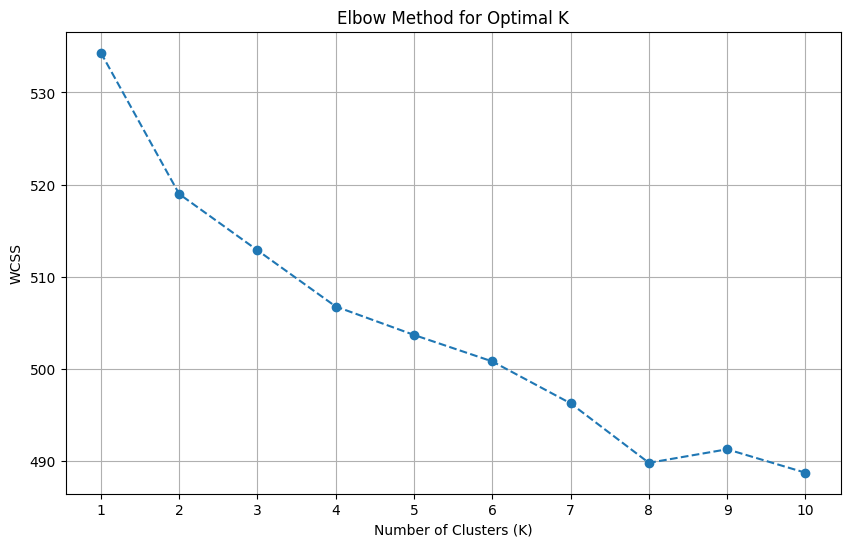


K-Means clustering performed with 8 clusters.
First 5 rows of df_cleaned with new 'cluster' column:
                                            comments    label  cluster
0  ingat yang menawari pendidikan gratis dan inte...  negatif        7
1  mungkin ada sabotase karena jika dari pihak do...  negatif        7
2  tidak pejabat nyaga rakyatnya korupsi terus an...  negatif        3
3  bagaimana kalau sebenarnya ini jebakan sih gem...  negatif        7
4                     wow mie gacoan bergizi katanya  positif        6


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the Elbow Method
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow plot, choose an optimal K. We used K=8 previously.
k_optimal = 8

kmeans_model = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init='auto', random_state=42)
df_cleaned['cluster'] = kmeans_model.fit_predict(X)

print(f"\nK-Means clustering performed with {k_optimal} clusters.")
print("First 5 rows of df_cleaned with new 'cluster' column:")
print(df_cleaned[['comments', 'label', 'cluster']].head())

Silhouette Score for K=8: 0.0281


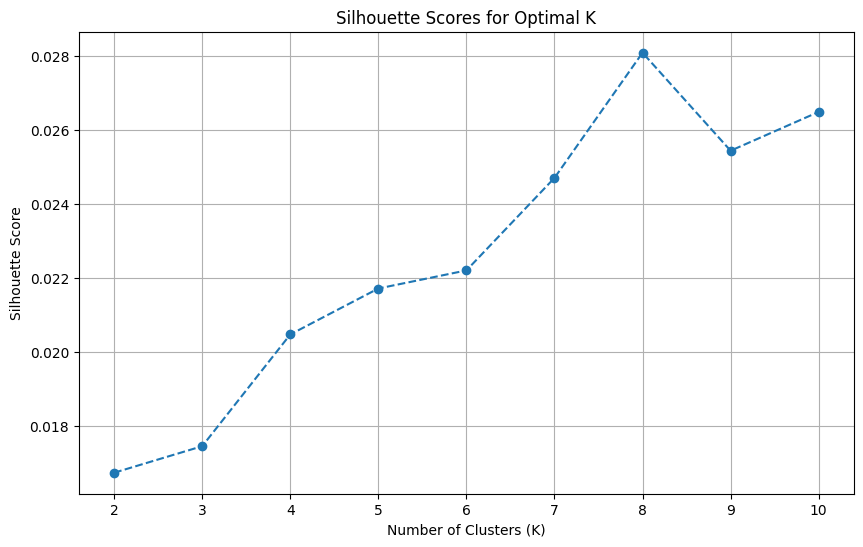

In [21]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the chosen k_optimal
silhouette_avg = silhouette_score(X, df_cleaned['cluster'])
print(f"Silhouette Score for K={k_optimal}: {silhouette_avg:.4f}")


# Optional: Visualize Silhouette Scores for different K
silhouette_scores = []
for i in range(2, 11): # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

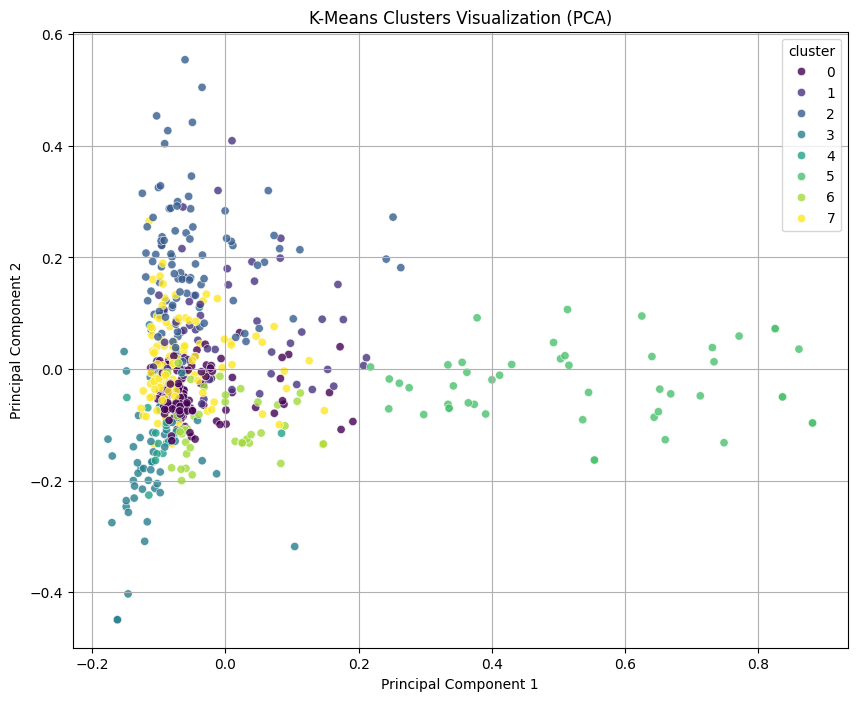

Cluster visualization using PCA complete.
The plot shows data points colored by their assigned cluster in a 2D space.


In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) # Use the TF-IDF features

# Add PCA components and cluster labels to a temporary DataFrame for plotting
plot_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
plot_df['cluster'] = df_cleaned['cluster'].values

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',
    data=plot_df,
    palette='viridis',
    legend='full',
    alpha=0.8
)
plt.title('K-Means Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("Cluster visualization using PCA complete.")
print("The plot shows data points colored by their assigned cluster in a 2D space.")

In [35]:
import hdbscan
import pandas as pd
import numpy as np

# Drop the previous 'cluster' column if it exists to perform new clustering
data_for_hdbscan = tfidf_df.drop(columns=['cluster'], errors='ignore')

# Initialize and fit the HDBSCAN model
# You might need to adjust parameters like min_cluster_size and min_samples
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=2, metric='euclidean')
hdbscan_cluster_labels = hdbscan_clusterer.fit_predict(data_for_hdbscan)

# Add the HDBSCAN cluster labels to a new DataFrame or update df_tfidf
# For clarity, let's create a copy or a new column for HDBSCAN results
df_tfidf_hdbscan = tfidf_df.copy()
df_tfidf_hdbscan['hdbscan_cluster'] = hdbscan_cluster_labels

print("HDBSCAN Cluster Distribution:")
print(df_tfidf_hdbscan['hdbscan_cluster'].value_counts())

# Display the DataFrame with new cluster labels (first few rows)
print("\nDataFrame with HDBSCAN clusters:")
display(df_tfidf_hdbscan.head())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN Cluster Distribution:
hdbscan_cluster
-1     420
 11     38
 7      17
 6      14
 10     13
 8      12
 3       7
 12      6
 9       5
 4       5
 0       5
 5       4
 2       4
 1       4
Name: count, dtype: int64

DataFrame with HDBSCAN clusters:


aaahhh  abang  abis  acara  aceh       ada  adalah  adek  adekku  adik  \
0     0.0    0.0   0.0    0.0   0.0  0.000000     0.0   0.0     0.0   0.0   
1     0.0    0.0   0.0    0.0   0.0  0.079823     0.0   0.0     0.0   0.0   
2     0.0    0.0   0.0    0.0   0.0  0.000000     0.0   0.0     0.0   0.0   
3     0.0    0.0   0.0    0.0   0.0  0.000000     0.0   0.0     0.0   0.0   
4     0.0    0.0   0.0    0.0   0.0  0.000000     0.0   0.0     0.0   0.0   

   ...   ya  yahbener  yaitu  yakin      yang  yanh  yekan  ygy  zaman  \
0  ...  0.0       0.0    0.0    0.0  0.120819   0.0    0.0  0.0    0.0   
1  ...  0.0       0.0    0.0    0.0  0.131264   0.0    0.0  0.0    0.0   
2  ...  0.0       0.0    0.0    0.0  0.000000   0.0    0.0  0.0    0.0   
3  ...  0.0       0.0    0.0    0.0  0.000000   0.0    0.0  0.0    0.0   
4  ...  0.0       0.0    0.0    0.0  0.000000   0.0    0.0  0.0    0.0   

   hdbscan_cluster  
0               -1  
1               -1  
2               -1  
3               -1  
4                7  

[5 rows x 1487 columns]

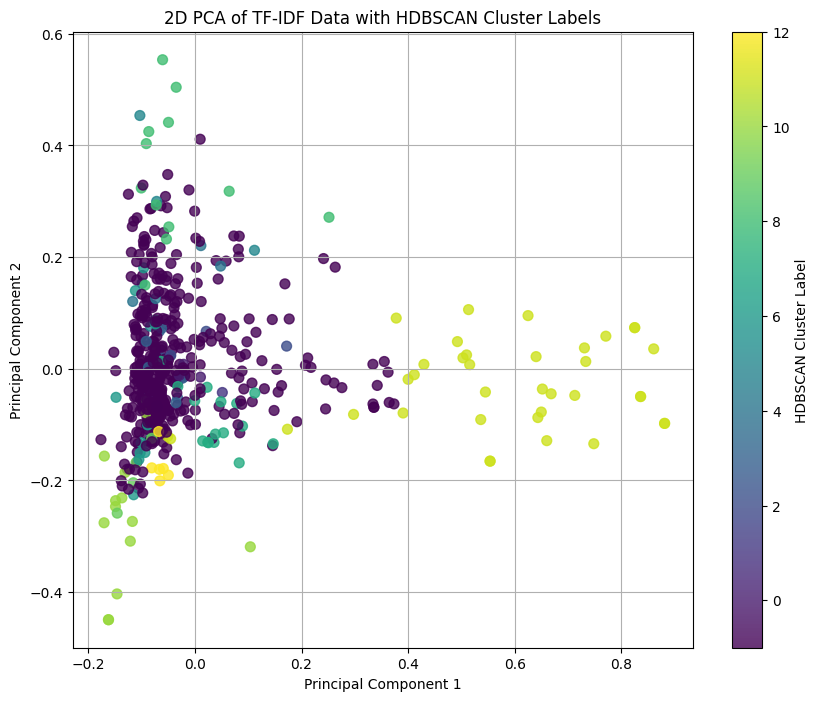

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features (TF-IDF scores) from the HDBSCAN cluster labels
X_hdbscan = tfidf_df.drop(columns=['cluster'], errors='ignore') # Use the original features
y_hdbscan = df_tfidf_hdbscan['hdbscan_cluster']

# Apply PCA to reduce dimensions to 2 components
pca_hdbscan = PCA(n_components=2)
X_pca_hdbscan = pca_hdbscan.fit_transform(X_hdbscan)

# Create a DataFrame for the PCA results for easier plotting
df_pca_hdbscan = pd.DataFrame(data = X_pca_hdbscan, columns = ['principal_component_1', 'principal_component_2'])
df_pca_hdbscan['hdbscan_cluster'] = y_hdbscan

# Plot the PCA results, colored by HDBSCAN cluster
plt.figure(figsize=(10, 8))
scatter_hdbscan = plt.scatter(df_pca_hdbscan['principal_component_1'], df_pca_hdbscan['principal_component_2'], c=df_pca_hdbscan['hdbscan_cluster'], cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of TF-IDF Data with HDBSCAN Cluster Labels')
plt.colorbar(scatter_hdbscan, label='HDBSCAN Cluster Label')
plt.grid(True)
plt.show()


In [37]:
# Now, let's find the top keywords for each HDBSCAN cluster, similar to before
print("\nTop keywords for each HDBSCAN cluster:")

num_top_keywords = 10 # You can adjust this number

for cluster_id in sorted(df_tfidf_hdbscan['hdbscan_cluster'].unique()):
    if cluster_id == -1: # -1 typically indicates noise points in HDBSCAN
        print(f"\nNoise Points (Cluster {cluster_id}):")
    else:
        print(f"\nCluster {cluster_id}:")

    # Filter data for the current cluster, dropping the 'cluster' columns themselves
    cluster_data_tfidf_hdbscan = df_tfidf_hdbscan[df_tfidf_hdbscan['hdbscan_cluster'] == cluster_id].drop(columns=['cluster', 'hdbscan_cluster'], errors='ignore')

    # Calculate the sum of TF-IDF scores for each word in this cluster
    summed_tfidf_scores_hdbscan = cluster_data_tfidf_hdbscan.sum()

    # Get the top keywords for this cluster
    top_keywords_hdbscan = summed_tfidf_scores_hdbscan.nlargest(num_top_keywords)

    # Display the keywords and their summed TF-IDF scores
    display(top_keywords_hdbscan.to_frame(name='Summed TF-IDF Score'))


Top keywords for each HDBSCAN cluster:

Noise Points (Cluster -1):


Summed TF-IDF Score
yang             21.932061
aku              20.573463
di               19.250215
tidak            18.775592
ya               16.182818
mbg              15.794222
ada              15.171380
makan            14.108773
racun            13.672777
itu              12.235680


Cluster 0:


Summed TF-IDF Score
bucket                2.088268
chum                  2.022676
dapur                 1.287898
mbg                   0.827593
chuk                  0.549990
nooo                  0.549990
spongebob             0.496521
plankton              0.473871
versi                 0.466136
wah                   0.424298


Cluster 1:


Summed TF-IDF Score
sendiri                      2.133861
masyarakat                   0.704208
berger                       0.565172
ah                           0.547006
suruh                        0.506048
racun                        0.481814
mending                      0.441131
bikin                        0.389442
lebih                        0.389442
bertanggungjawab             0.373384


Cluster 2:


Summed TF-IDF Score
goblok               2.983844
mbg                  1.011003
bikin                0.586520
buah                 0.507812
yang                 0.384306
repot                0.335368
makan                0.325689
saja                 0.324758
daripada             0.253906
mending              0.253906


Cluster 3:


Summed TF-IDF Score
tanggung             2.461258
jawab                2.166209
mau                  1.233709
kalau                0.953540
apa                  0.944938
tua                  0.932139
tidak                0.877744
siswa                0.836607
bisa                 0.790180
orang                0.659682


Cluster 4:


Summed TF-IDF Score
aman                     2.372446
alhamdulilah             1.045203
hehe                     0.740561
saja                     0.736919
aku                      0.710383
sekolah                  0.588057
di                       0.585594
ya                       0.557791
kok                      0.544160
mbgnya                   0.515269


Cluster 5:


Summed TF-IDF Score
teman             1.434368
aku               1.154106
ulat              0.988441
ibu               0.742682
ya                0.734700
yang              0.532361
ada               0.475089
tadi              0.418599
lah               0.405295
makan             0.394638


Cluster 6:


Summed TF-IDF Score
semangka                4.459333
anjing                  2.556627
tulungagung             1.768640
apa                     1.554938
tipis                   1.471027
kaget                   1.240046
itu                     1.222083
setip                   1.120408
ya                      0.929508
potong                  0.794476


Cluster 7:


Summed TF-IDF Score
gaco               6.627529
mie                6.258924
gizi               4.104966
jir                1.134090
mbg                1.055272
ya                 0.962540
pagi               0.815696
no                 0.738431
kurang             0.732136
itu                0.717729


Cluster 8:


Summed TF-IDF Score
dapat               4.062659
belum               2.625223
mbg                 2.324616
sekolah             2.254423
aku                 1.762689
untung              1.626256
kami                1.119183
kasih               1.028622
di                  0.912030
pernah              0.911133


Cluster 9:


Summed TF-IDF Score
rakyat               1.947984
perintah             1.381466
sama                 1.278829
vendor               1.055058
saja                 0.891140
korupsi              0.842879
dpr                  0.572134
bzirr                0.470893
rupa                 0.455544
cermin               0.404492


Cluster 10:


Summed TF-IDF Score
korupsi             6.921041
banyak              2.604223
negara              1.370408
di                  1.333345
pasti               1.180438
yang                0.915267
duit                0.806594
negeri              0.754948
halah               0.689710
itu                 0.654283


Cluster 11:


Summed TF-IDF Score
gratis               17.109269
makan                12.575493
racun                 7.747608
gizi                  5.875042
mbg                   5.497639
indonesia             2.559211
cemas                 2.213405
mbgmakan              2.173258
hiu                   1.437150
arti                  1.298997


Cluster 12:


Summed TF-IDF Score
goreng             3.043160
hiu                2.390575
ikan               2.351401
bejir              0.659670
jir                0.539282
lele               0.445296
geloh              0.401316
tuna               0.401316
sampai             0.379341
kenapa             0.310216

Generating Word Clouds for each HDBSCAN Cluster:


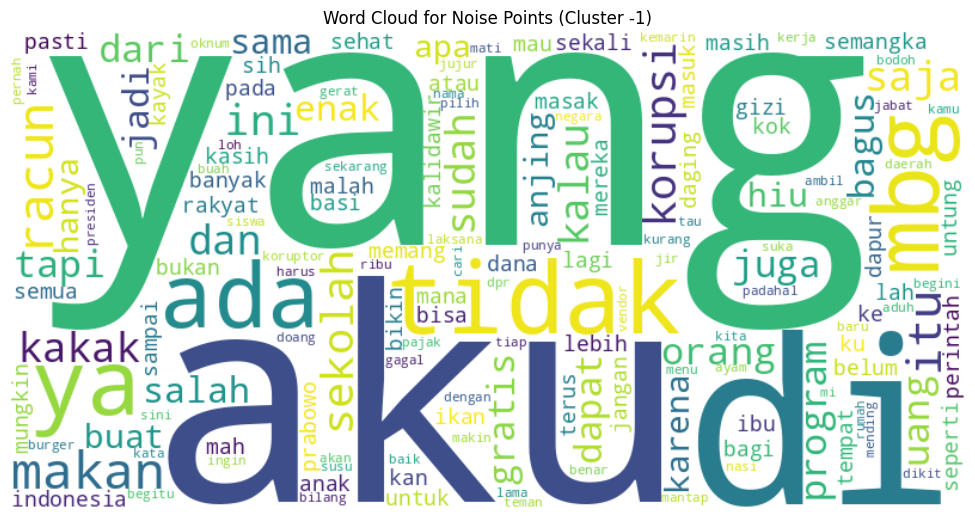

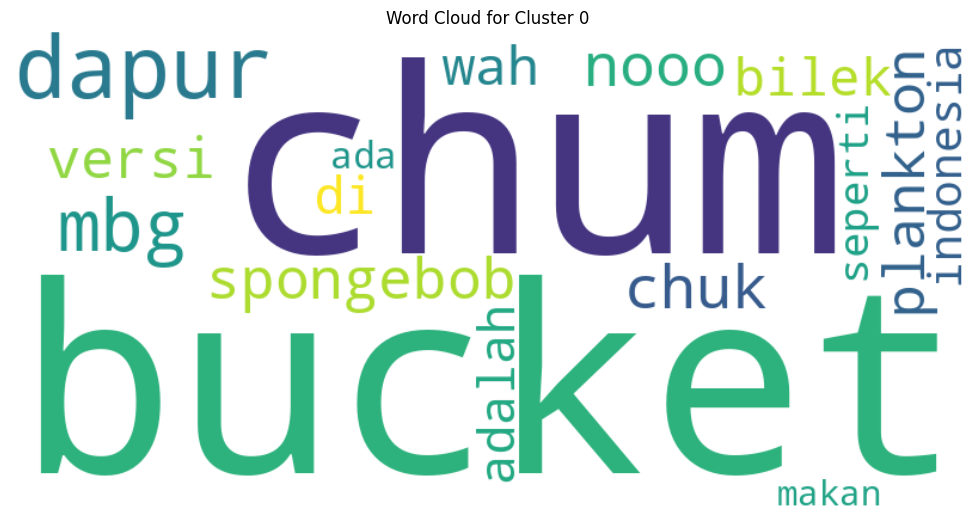

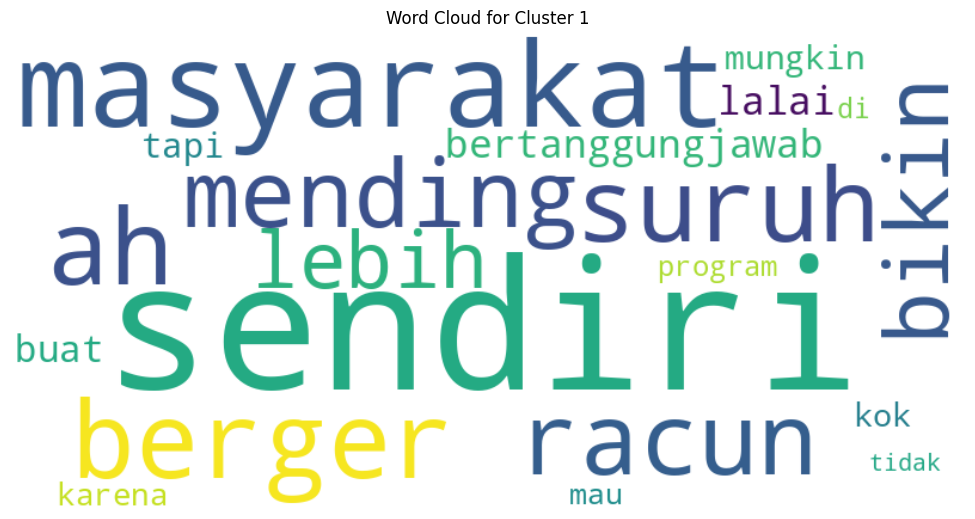

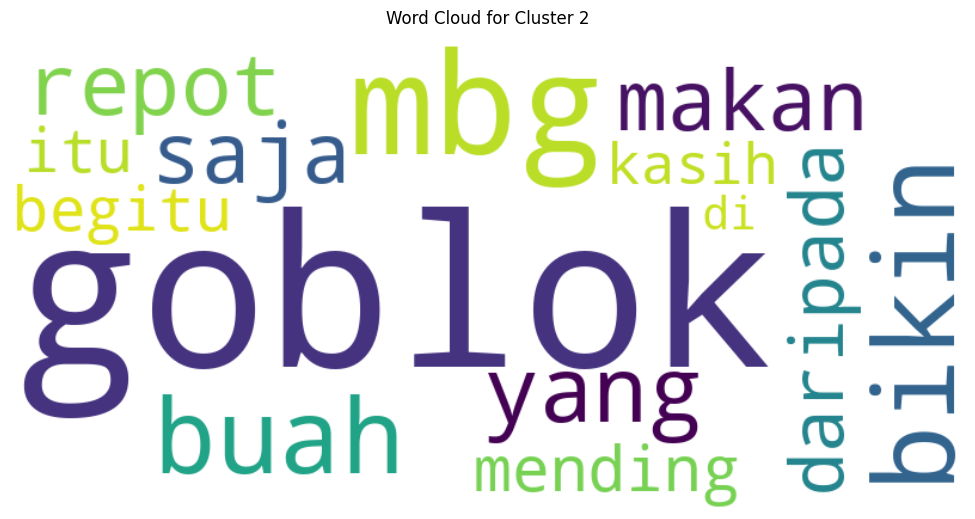

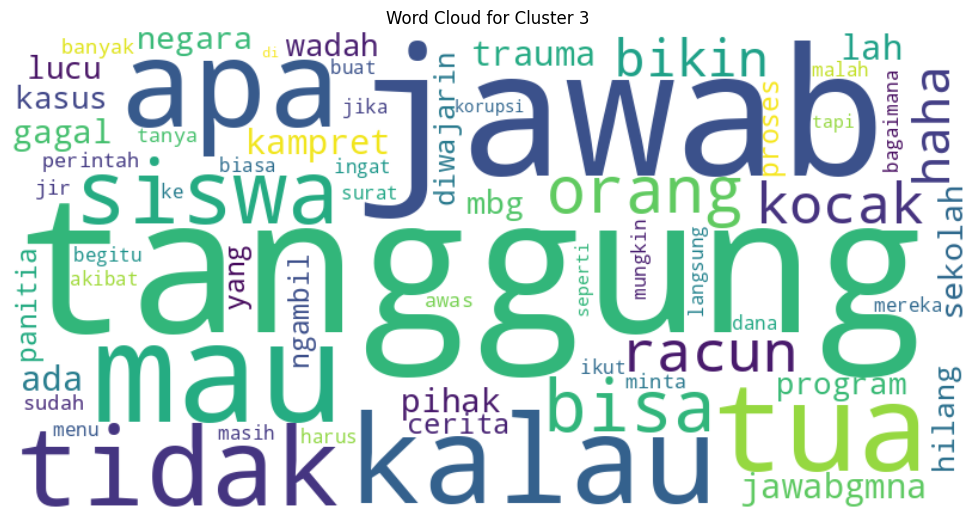

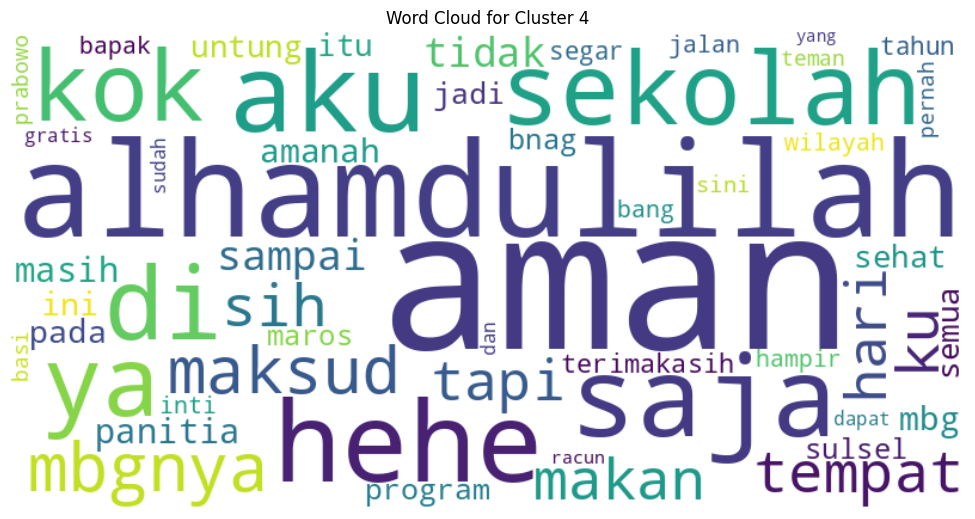

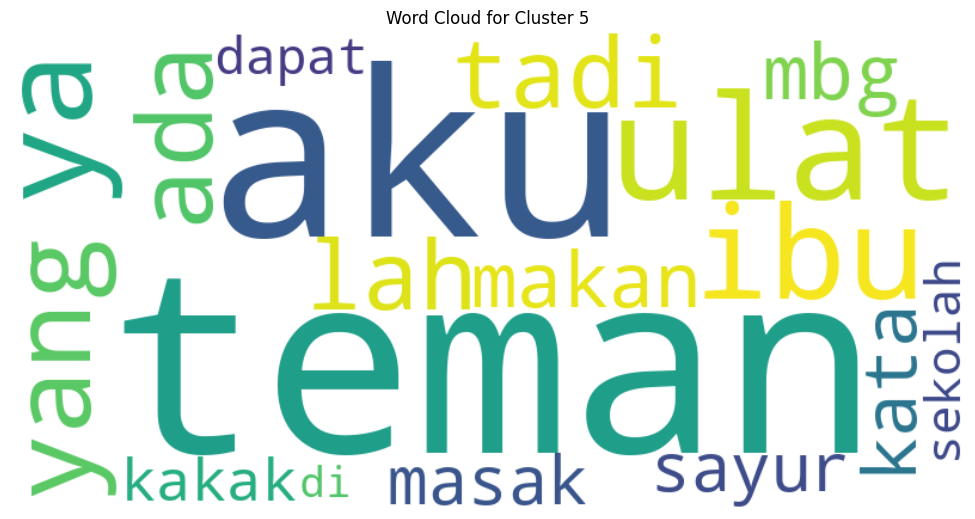

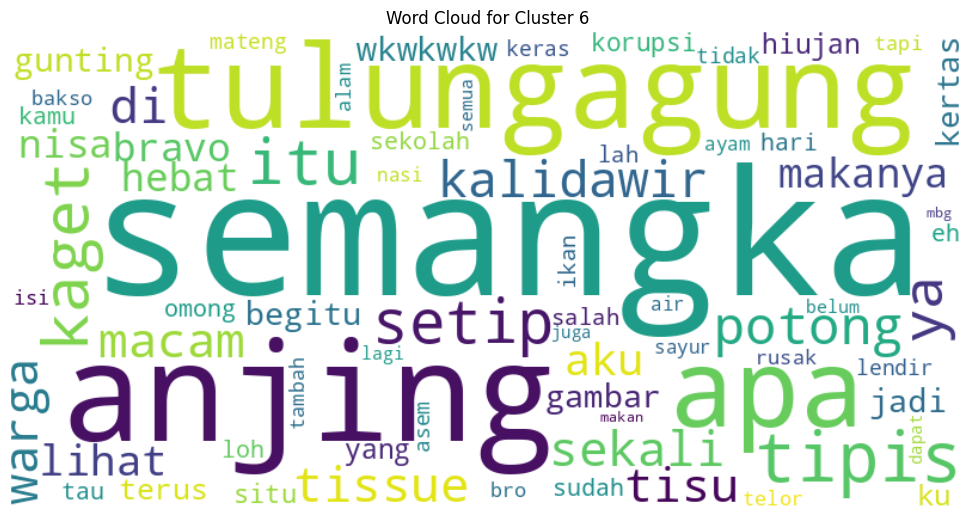

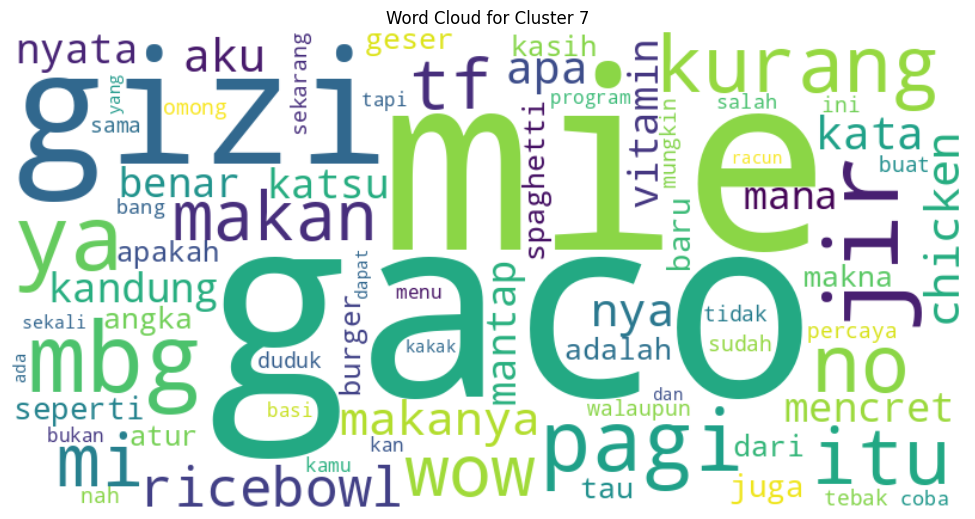

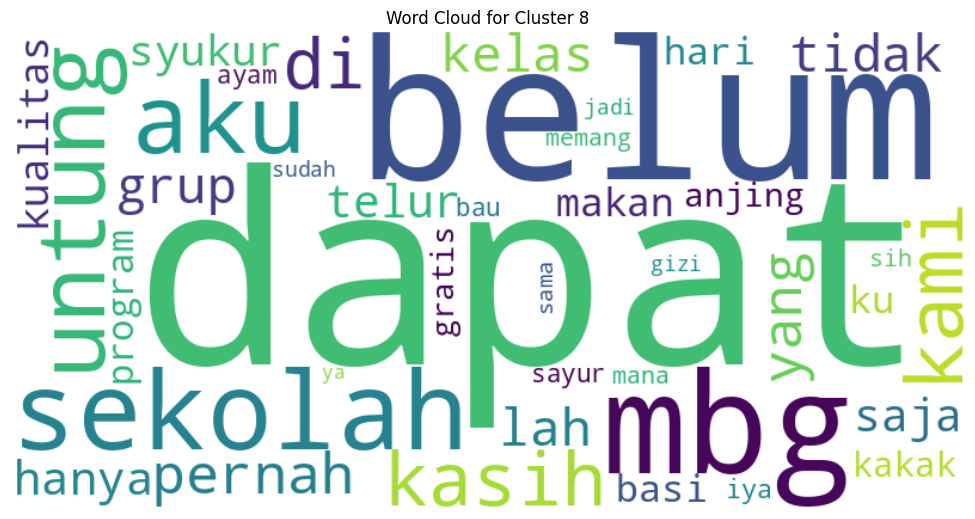

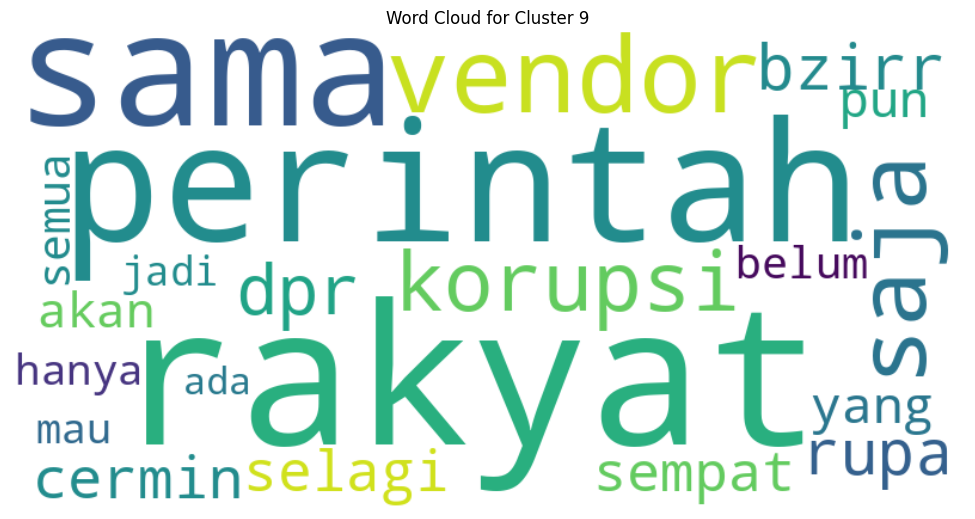

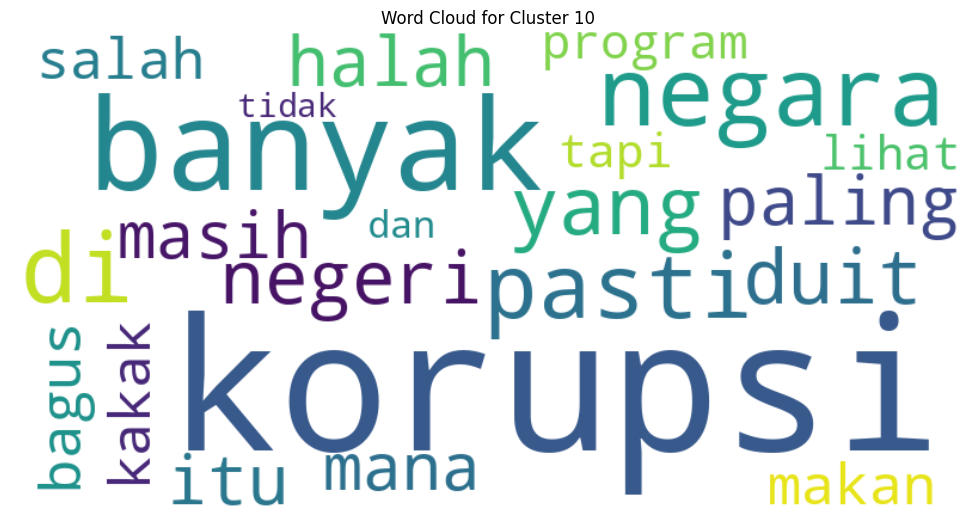

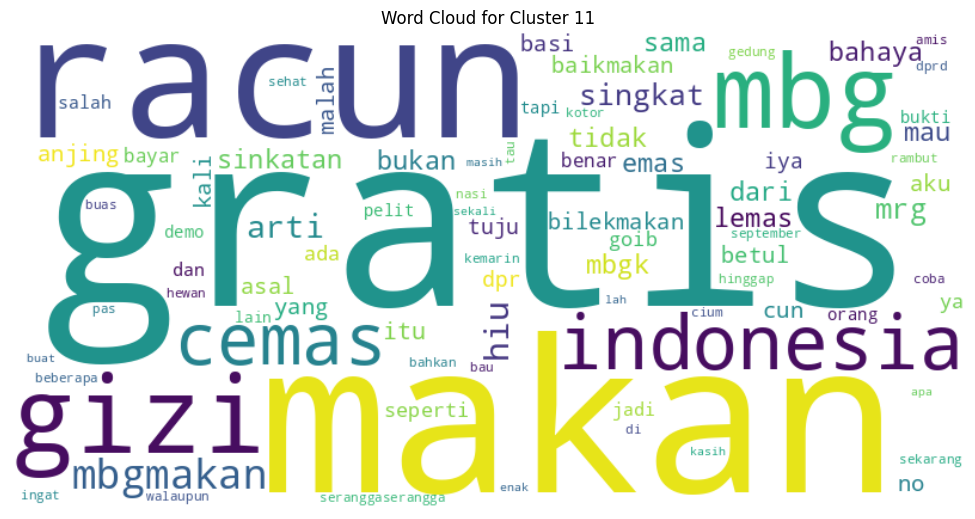

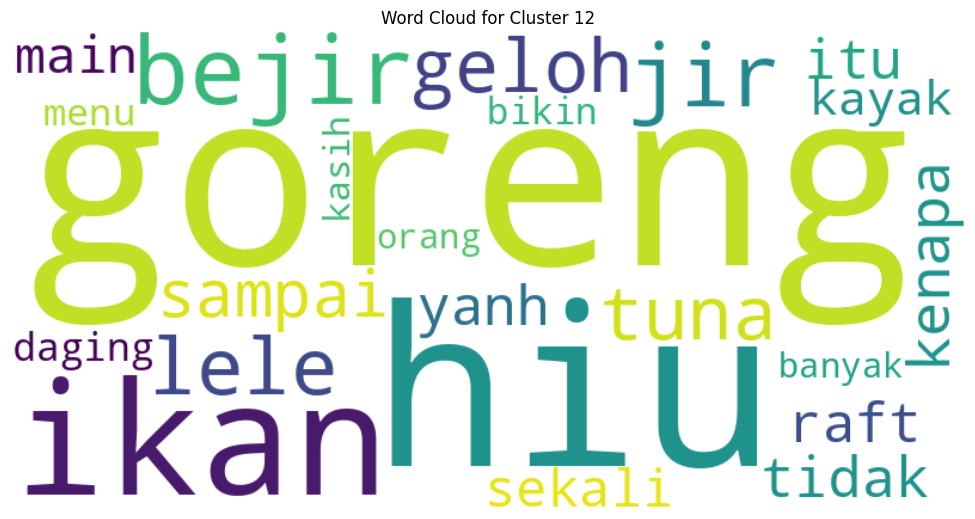

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("Generating Word Clouds for each HDBSCAN Cluster:")

for cluster_id in sorted(df_tfidf_hdbscan['hdbscan_cluster'].unique()):
    if cluster_id == -1:
        title = f"Word Cloud for Noise Points (Cluster {cluster_id})"
    else:
        title = f"Word Cloud for Cluster {cluster_id}"

    # Filter data for the current cluster, dropping the 'cluster' columns
    cluster_data_tfidf_hdbscan = df_tfidf_hdbscan[df_tfidf_hdbscan['hdbscan_cluster'] == cluster_id].drop(columns=['cluster', 'hdbscan_cluster'], errors='ignore')

    # Calculate the sum of TF-IDF scores for each word in this cluster
    summed_tfidf_scores_hdbscan = cluster_data_tfidf_hdbscan.sum()

    # Filter out words with zero TF-IDF score for better visualization
    word_tfidf_dict = summed_tfidf_scores_hdbscan[summed_tfidf_scores_hdbscan > 0].to_dict()

    if not word_tfidf_dict:
        print(f"No significant keywords found for {title.replace('Word Cloud for ', '')}")
        continue

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          min_font_size=10).generate_from_frequencies(word_tfidf_dict)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

model 3 bertopic

In [40]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.6 MB/s eta 0:00:00


In [44]:
documents = df_cleaned['processed_message'].tolist()
print(f"Number of documents extracted: {len(documents)}")
print("First 5 documents:")
for i, doc in enumerate(documents[:5]):
    print(f"- {doc}")

Number of documents extracted: 554
First 5 documents:
- ingat yang tawar didik gratis dan internet gratis lalu orang goblok di indonesia nyinyir
- mungkin ada sabotase karena jika dari pihak donatur tidak mungkin lalu jika pihak yang masak itu makan juga tidak mungkin karena jika asal dari tempat masak kenapa tidak semua yang kena hanya bagi besar saja
- tidak jabat nyaga rakyat korupsi terus anjing
- bagaimana kalau benar ini jebak sih gemoy jadi dia bikin program begini biar nangkep para orang orang korupsi
- wow mie gaco gizi kata


In [45]:
from bertopic import BERTopic

# Initialize BERTopic model with a lower min_topic_size
# Using 'paraphrase-multilingual-MiniLM-L12-v2' for better multilingual support and performance on smaller datasets
# min_topic_size is lowered to allow smaller clusters to be identified
model = BERTopic(embedding_model="paraphrase-multilingual-MiniLM-L12-v2", verbose=True)

# Fit the model to the documents and transform them
topics, probabilities = model.fit_transform(documents)

print("BERTopic model initialized and fitted with min_topic_size=2.")
print(f"Number of topics discovered: {len(model.get_topics())}")
print(f"First 10 document topic assignments: {topics[:10]}")

print("\nOverview of topics and their sizes with min_topic_size=2:")
display(model.get_topic_info())

2025-12-15 12:56:44,492 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/18 [00:00<?, ?it/s]

2025-12-15 12:56:55,422 - BERTopic - Embedding - Completed ✓
2025-12-15 12:56:55,424 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-15 12:57:07,932 - BERTopic - Dimensionality - Completed ✓
2025-12-15 12:57:07,933 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-15 12:57:07,952 - BERTopic - Cluster - Completed ✓
2025-12-15 12:57:07,956 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-15 12:57:07,978 - BERTopic - Representation - Completed ✓


BERTopic model initialized and fitted with min_topic_size=2.
Number of topics discovered: 12
First 10 document topic assignments: [6, 9, 2, -1, 0, 2, 5, 1, -1, 10]

Overview of topics and their sizes with min_topic_size=2:


Topic  Count                            Name  \
0      -1     63          -1_yang_sekolah_aku_di   
1       0    154               0_gaco_aku_mbg_ya   
2       1     97        1_racun_gratis_makan_mbg   
3       2     54  2_korupsi_rakyat_yang_koruptor   
4       3     38             3_uang_ya_yang_dari   
5       4     36          4_sekolah_aku_dapat_di   
6       5     28   5_semangka_anjing_setip_tipis   
7       6     20     6_indonesia_cemas_ibu_orang   
8       7     19           7_ikan_hiu_goreng_itu   
9       8     18        8_program_ini_bukan_tapi   
10      9     15        9_dapur_masak_dan_bucket   
11     10     12   10_tidak_siswa_jawab_tanggung   

                                       Representation  \
0   [yang, sekolah, aku, di, ya, tidak, mbg, ada, ...   
1   [gaco, aku, mbg, ya, mie, gizi, di, itu, makan...   
2   [racun, gratis, makan, mbg, gizi, tidak, yang,...   
3   [korupsi, rakyat, yang, koruptor, ada, di, per...   
4   [uang, ya, yang, dari, vendor, pajak, saja, it...   
5   [sekolah, aku, dapat, di, aman, ku, mbg, tidak...   
6   [semangka, anjing, setip, tipis, kertas, di, a...   
7   [indonesia, cemas, ibu, orang, hamil, bodoh, d...   
8   [ikan, hiu, goreng, itu, kakak, makan, laut, b...   
9   [program, ini, bukan, tapi, oknum, salah, awal...   
10  [dapur, masak, dan, bucket, yang, kerja, chum,...   
11  [tidak, siswa, jawab, tanggung, yang, dana, se...   

                                  Representative_Docs  
0   [mau presiden ya kualitas ya premium pun kalau...  
1   [mie gaco gizi, mbg gaco gizi ya dari mana gac...  
2   [mbg makan gizi gratis mbg makan racun gratis,...  
3                     [korupsi itu, korupsi, korupsi]  
4   [ini ada yang mau cuci uang dari program perin...  
5   [sekolah aku yang dapat mbg hanya kelas saja, ...  
6   [itu semangka apa anjing tipis sekali, anjing ...  
7   [indonesia cemas, indonesia emas indonesia cem...  
8   [ikan lele goreng ikan hiu goreng, jir ikan hi...  
9   [segera evaluasi contoh kan banyak yang hasil ...  
10  [mending bikin dapur jir jadi masak langsung a...  
11  [niat ya ingin ikut sekolah luar kalau istirah...

In [46]:
print("Overview of topics and their sizes:")
display(model.get_topic_info())

Overview of topics and their sizes:


Topic  Count                            Name  \
0      -1     63          -1_yang_sekolah_aku_di   
1       0    154               0_gaco_aku_mbg_ya   
2       1     97        1_racun_gratis_makan_mbg   
3       2     54  2_korupsi_rakyat_yang_koruptor   
4       3     38             3_uang_ya_yang_dari   
5       4     36          4_sekolah_aku_dapat_di   
6       5     28   5_semangka_anjing_setip_tipis   
7       6     20     6_indonesia_cemas_ibu_orang   
8       7     19           7_ikan_hiu_goreng_itu   
9       8     18        8_program_ini_bukan_tapi   
10      9     15        9_dapur_masak_dan_bucket   
11     10     12   10_tidak_siswa_jawab_tanggung   

                                       Representation  \
0   [yang, sekolah, aku, di, ya, tidak, mbg, ada, ...   
1   [gaco, aku, mbg, ya, mie, gizi, di, itu, makan...   
2   [racun, gratis, makan, mbg, gizi, tidak, yang,...   
3   [korupsi, rakyat, yang, koruptor, ada, di, per...   
4   [uang, ya, yang, dari, vendor, pajak, saja, it...   
5   [sekolah, aku, dapat, di, aman, ku, mbg, tidak...   
6   [semangka, anjing, setip, tipis, kertas, di, a...   
7   [indonesia, cemas, ibu, orang, hamil, bodoh, d...   
8   [ikan, hiu, goreng, itu, kakak, makan, laut, b...   
9   [program, ini, bukan, tapi, oknum, salah, awal...   
10  [dapur, masak, dan, bucket, yang, kerja, chum,...   
11  [tidak, siswa, jawab, tanggung, yang, dana, se...   

                                  Representative_Docs  
0   [mau presiden ya kualitas ya premium pun kalau...  
1   [mie gaco gizi, mbg gaco gizi ya dari mana gac...  
2   [mbg makan gizi gratis mbg makan racun gratis,...  
3                     [korupsi itu, korupsi, korupsi]  
4   [ini ada yang mau cuci uang dari program perin...  
5   [sekolah aku yang dapat mbg hanya kelas saja, ...  
6   [itu semangka apa anjing tipis sekali, anjing ...  
7   [indonesia cemas, indonesia emas indonesia cem...  
8   [ikan lele goreng ikan hiu goreng, jir ikan hi...  
9   [segera evaluasi contoh kan banyak yang hasil ...  
10  [mending bikin dapur jir jadi masak langsung a...  
11  [niat ya ingin ikut sekolah luar kalau istirah...

In [47]:
import matplotlib.pyplot as plt

# 1. Visualize Topics in a 2D map
print("Generating 2D Topic Visualization (UMAP projection)...")
# Add a try-except block to gracefully handle ValueError from UMAP with sparse data
try:
    if len(model.get_topics()) > 1: # Ensure there's more than just the noise topic
        model.visualize_topics()
    else:
        print("Skipping 2D topic visualization: Not enough distinct topics (only noise found).")
except ValueError as e:
    print(f"Skipping 2D topic visualization due to an error: {e}")
    print("This often happens with very small datasets where UMAP cannot form a valid projection.")

# 2. Visualize Top Words per Topic (Bar Charts)
print("\nGenerating Bar Charts for each topic's keywords...")
for topic_id in sorted(model.get_topics().keys()):
    if topic_id == -1:
        title = f"Keywords for Noise Topic {topic_id}"
    else:
        title = f"Keywords for Topic {topic_id}"

    print(f"\n{title}:")
    # Use visualize_barchart to get a nice plot
    fig = model.visualize_barchart(topics=[topic_id], n_words=10)
    if fig:
        fig.show()
    else:
        print("No barchart generated (possibly no keywords for this topic).")

Generating 2D Topic Visualization (UMAP projection)...

Generating Bar Charts for each topic's keywords...

Keywords for Noise Topic -1:



Keywords for Topic 0:



Keywords for Topic 1:



Keywords for Topic 2:



Keywords for Topic 3:



Keywords for Topic 4:



Keywords for Topic 5:



Keywords for Topic 6:



Keywords for Topic 7:



Keywords for Topic 8:



Keywords for Topic 9:



Keywords for Topic 10:


In [48]:
import matplotlib.pyplot as plt

print("Generating Intertopic Distance Map...")
# Visualize topics: a 2D map of topics (UMAP projection)
# This plot is interactive, so it will be displayed directly if executed in a Colab environment.
try:
    fig = model.visualize_topics()
    # If you want to show the figure explicitly (useful in non-interactive environments)
    if fig:
        fig.show()
    else:
        print("Could not generate Intertopic Distance Map. This might happen with very few topics or documents.")
except ValueError as e:
    print(f"Skipping Intertopic Distance Map due to an error: {e}")
    print("This often happens with very small datasets where UMAP cannot form a valid projection for topic distances.")

Generating Intertopic Distance Map...
